# CapiPort - PORTFOLIO OPTIMISATION

    Two things to consider for Portfolio Optimisation:
    
        1) Minimising Risk
        2) Maximising Return

    Basic process of Portfolio Optimisation:
        
        1) Select the Asset class to work on.
            1.1) Asset Class choosen - Equity (Stocks)
        2) Select the Companies which you want to use to build a Portfolio.
            2.1) Companies choosen - 
                2.1.1) Tata Power - TATAPOWER.NS
                2.1.2) Tata Motors - TATAMOTORS.NS
                2.1.3) Tata Steel - TATASTEEL.NS
                2.1.4) Zomato - ZOMATO.NS
                2.1.5) NHPC - NHPC.NS
                2.1.6) NCC - NCC.NS
                2.1.7) IREDA - IREDA.NS
                2.1.8) IRCON - IRCON.NS
        3) To try various Statistical Methods relating to Portfolio Optimisation.
            3.1) Method 1 - Result
            3.2) Method 2 - Result
        4) You will obtain Weigths or Percentages of Portfolio to invest.
            4.1) Method 1 - Weights
            4.2) Method 2 - Weights
        5) Testing the Portfolio for the future.
            5.1) Method 1 - Result
            5.2) Method 2 - Result
        6) Final Result

# <u>Steps of Implementation</u>

    1) Importing Libraries
    2) Select the Financial Instruments
    3) Get the Adjacent Close prices of Last 5 Years
    4) Calculating the Log-Return of Company Dataset
    5) Calculating the Sharpe Ratio
    6) Getting Started with Monte Carlo
    7) Let's look closer at the Simulations

## Importing Libraries

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_opt

from pprint import pprint
from sklearn.preprocessing import StandardScaler

import yfinance as yf

# Set some display options for Pandas.
pd.set_option('expand_frame_repr', False)

## Select the Financial Instruments

In [2]:
## Have Choosen Stocks

## The Companies selected to build a Optimal Portfolio
com_sel = ["TATAPOWER.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "RELIANCE.NS", "ADANIENT.NS", "ADANIPORTS.NS"]

## We will need Number of Tickers for future
num_tick = len(com_sel)

## Get the Adjacent Close prices of Last 5 Years

In [3]:
com_data = yf.download(com_sel, start="2019-03-01", end="2024-03-01")['Adj Close']

com_data.head()

[*********************100%%**********************]  6 of 6 completed


Ticker      ADANIENT.NS  ADANIPORTS.NS  RELIANCE.NS  TATAMOTORS.NS  TATAPOWER.NS  TATASTEEL.NS
Date                                                                                          
2019-03-01   132.264633     322.673431  1098.479736     179.739807     61.861309     43.332832
2019-03-05   140.120483     328.532288  1108.872925     193.447083     63.798790     44.540791
2019-03-06   137.600677     326.401764  1133.197998     188.213394     65.782417     44.463959
2019-03-07   135.278519     330.130127  1138.080933     188.711853     65.090462     44.489574
2019-03-08   136.563110     331.340698  1135.258667     180.637009     64.583023     43.354172

## Calculating the Log-Return of Company Dataset

In [4]:
## Log-Return of Company Dataset
log_return = np.log(1 + com_data.pct_change())

## Calculating the Sharpe Ratio

In [5]:
## Generate Random Weights
rand_weig = np.array(np.random.random(num_tick))

## Rebalancing Random Weights
rebal_weig = rand_weig / np.sum(rand_weig)

## Calculate the Expected Returns, Annualize it by * 247.0
exp_ret = np.sum((log_return.mean() * rebal_weig) * 247)

## Calculate the Expected Volatility, Annualize it by * 247.0
exp_vol = np.sqrt(
np.dot(
    rebal_weig.T,
    np.dot(
        log_return.cov() * 247,
        rebal_weig
    )
)
)

## Calculate the Sharpe Ratio.
sharpe_ratio = exp_ret / exp_vol

# Put the weights into a data frame to see them better.
weights_df = pd.DataFrame(data={
'random_weights': rand_weig,
'rebalance_weights': rebal_weig
})

print('')
print('='*90)
print('PORTFOLIO WEIGHTS:')
print('-'*90)
print(weights_df)
print('-'*90)

# Do the same with the other metrics.
metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_ret,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

print('')
print('='*90)
print('PORTFOLIO METRICS:')
print('-'*90)
print(metrics_df)
print('-'*90)


PORTFOLIO WEIGHTS:
------------------------------------------------------------------------------------------
   random_weights  rebalance_weights
0        0.180926           0.069165
1        0.010467           0.004001
2        0.442599           0.169198
3        0.811715           0.310305
4        0.409706           0.156624
5        0.760449           0.290707
------------------------------------------------------------------------------------------

PORTFOLIO METRICS:
------------------------------------------------------------------------------------------
   Expected Portfolio Returns  Expected Portfolio Volatility  Portfolio Sharpe Ratio
0                    0.306969                       0.307192                0.999276
------------------------------------------------------------------------------------------


## Getting Started with Monte Carlo

In [6]:
## Let's get started with Monte Carlo Simulations

## How many times should we run Monte Carlo
num_of_port = 20000

## Create an Array to store the weights as they are generated
all_weights = np.zeros((num_of_port, num_tick))

## Create an Array to store the returns as they are generated
ret_arr = np.zeros(num_of_port)

## Create an Array to store the volatilities as they are generated
vol_arr = np.zeros(num_of_port)

## Create an Array to store the Sharpe Ratios as they are generated
sharpe_arr = np.zeros(num_of_port)

## Monte Carlo Simulations

In [7]:
## Let's start the Monte Carlo Simulation

for ind in range(num_of_port):
    
    ## Let's first Calculate the Weights
    weig = np.array(np.random.random(num_tick))
    weig = weig / np.sum(weig)
    
    ## Append the Weights to Weigths array
    all_weights[ind, :] = weig
    
    ## Calculate and Append the Expected Log Returns to Returns Array
    ret_arr[ind] = np.sum((log_return.mean() * weig) * 247)
    
    ## Calculate and Append the Volatility to the Volatitlity Array
    vol_arr[ind] = np.sqrt(
        np.dot(weig.T, np.dot(log_return.cov() * 247, weig))
    )
    
    ## Calculate and Append the Sharpe Ratio to Sharpe Ratio Array
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

## Let's look closer at the Simulations

In [8]:
## Let's create a Data Frame with Weights, Returns, Volatitlity, and the Sharpe Ratio
sim_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

## Create a Data Frame using above, then Transpose it
sim_df = pd.DataFrame(data = sim_data).T

## Give the columns in Simulation Data Proper Names
sim_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]

## Make sure the Data Types are correct in the Data Frame
sim_df = sim_df.infer_objects()

# Print out the results.
print('')
print('='*90)
print('SIMULATIONS RESULT:')
print('-'*90)
print(sim_df.head())
print('-'*90)


SIMULATIONS RESULT:
------------------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio                                  Portfolio Weights
0  0.386904    0.333399      1.160483  [0.3150312209419956, 0.2238901925845945, 0.055...
1  0.324310    0.282726      1.147080  [0.13585396400045283, 0.21898629748712684, 0.2...
2  0.274413    0.283271      0.968728  [0.040532773086664156, 0.21976943153480988, 0....
3  0.333915    0.286389      1.165947  [0.18490446424930748, 0.1374780866867471, 0.27...
4  0.344173    0.303290      1.134796  [0.16840813424759166, 0.27132535034095534, 0.0...
------------------------------------------------------------------------------------------


## Look at Important Metrics

In [9]:
# Return the Max Sharpe Ratio from the run.
max_sharpe_ratio = sim_df.loc[sim_df['Sharpe Ratio'].idxmax()]

# Return the Min Volatility from the run.
min_volatility = sim_df.loc[sim_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('-'*80)
print(max_sharpe_ratio)
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY:')
print('-'*80)
print(min_volatility)
print('-'*80)


MAX SHARPE RATIO:
--------------------------------------------------------------------------------
Returns                                                       0.432582
Volatility                                                    0.328832
Sharpe Ratio                                                  1.315513
Portfolio Weights    [0.4113690848985404, 0.004429081705741692, 0.2...
Name: 15537, dtype: object
--------------------------------------------------------------------------------

MIN VOLATILITY:
--------------------------------------------------------------------------------
Returns                                                       0.260189
Volatility                                                      0.2604
Sharpe Ratio                                                  0.999189
Portfolio Weights    [0.009702368306188258, 0.15720111499006897, 0....
Name: 5364, dtype: object
--------------------------------------------------------------------------------


## Let's Visualize the Monte Carlo Simulation

/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipykernel_7250/3549902619.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_ratio[1],
/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipykernel_7250/3549902619.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_ratio[0],
/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipykernel_7250/3549902619.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_volati

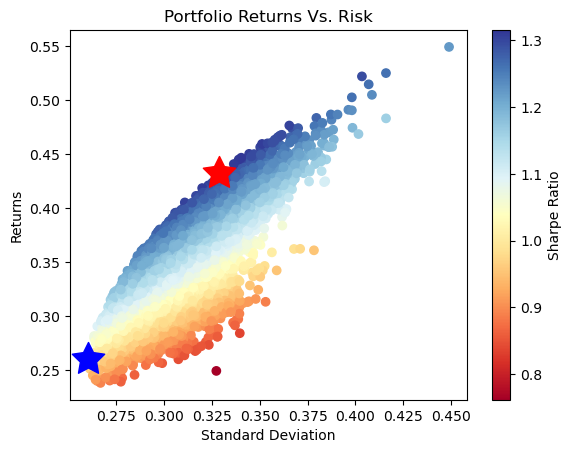

In [10]:
# This is so I can see the plot inside of my Jupyter Notebook.
%matplotlib inline

# Plot the data on a Scatter plot.
plt.scatter(
    y=sim_df['Returns'],
    x=sim_df['Volatility'],
    c=sim_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Give the Plot some labels, and titles.
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot the Max Sharpe Ratio, using a `Red Star`.
plt.scatter(
    max_sharpe_ratio[1],
    max_sharpe_ratio[0],
    marker=(5, 1, 0),
    color='r',
    s=600
)

# Plot the Min Volatility, using a `Blue Star`.
plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# Finally, show the plot.
plt.show()

In [11]:
import plotly.graph_objects as go

# Plot the data on a Scatter plot.
fig = go.Figure(data=go.Scatter(
    x=sim_df['Volatility'],
    y=sim_df['Returns'],
    mode='markers',
    marker=dict(
        color=sim_df['Sharpe Ratio'],
        colorscale='RdYlBu',
        size=10
    )
))

# Add color bar
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Sharpe Ratio'
    )
)

# Add title and axis labels
fig.update_layout(
    title='Portfolio Returns Vs. Risk',
    xaxis=dict(title='Standard Deviation'),
    yaxis=dict(title='Returns')
)

# Plot the Max Sharpe Ratio, using a `Red Star`.
fig.add_trace(go.Scatter(
    x=[max_sharpe_ratio[1]],
    y=[max_sharpe_ratio[0]],
    mode='markers',
    marker=dict(
        color='red',
        symbol='star',
        size=20
    ),
    name='Max Sharpe Ratio'
))

# Plot the Min Volatility, using a `Blue Star`.
fig.add_trace(go.Scatter(
    x=[min_volatility[1]],
    y=[min_volatility[0]],
    mode='markers',
    marker=dict(
        color='blue',
        symbol='star',
        size=20
    ),
    name='Min Volatility'
))

# Show the plot
fig.show()


/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipykernel_7250/2037253725.py:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipykernel_7250/2037253725.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipykernel_7250/2037253725.py:44: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/jx/_r4pg95j3pzdd581p_wql9pc0000gn/T/ipy